# Assignment 8: Moving Beyond Linearity

Dataset(s) needed:
Hitters data frame of the ISLR library SF-DAT-21. In this assignment, we're going to predict Salary based on Hits as the only independent variable.

In [49]:
# Imports
import matplotlib.pyplot as plt
import warnings
%matplotlib inline
warnings.filterwarnings("ignore")
import pandas as pd
from sklearn import (
    ensemble,
    model_selection,    
    preprocessing,
    tree,
)
from sklearn.metrics import (
    auc,
    confusion_matrix,
    roc_auc_score,
    roc_curve,
)
from sklearn.model_selection import (
    train_test_split,
    StratifiedKFold,
)

import pandas_profiling

from sklearn.model_selection import train_test_split

train = pd.read_csv('Hitters.csv')
train.head(10)

,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,CHmRun,CRuns,CRBI,CWalks,League,Division,PutOuts,Assists,Errors,Salary,NewLeague
0,293,66,1,30,29,14,1,293,66,1,30,29,14,A,E,446,33,20,NaN,A
1,315,81,7,24,38,39,14,3449,835,69,321,414,375,N,W,632,43,10,475.0,N
2,479,130,18,66,72,76,3,1624,457,63,224,266,263,A,W,880,82,14,480.0,A
3,496,141,20,65,78,37,11,5628,1575,225,828,838,354,N,E,200,11,3,500.0,N
4,321,87,10,39,42,30,2,396,101,12,48,46,33,N,E,805,40,4,91.5,N
5,594,169,4,74,51,35,11,4408,1133,19,501,336,194,A,W,282,421,25,750.0,A
6,185,37,1,23,8,21,2,214,42,1,30,9,24,N,E,76,127,7,70.0,A
7,298,73,0,24,24,7,3,509,108,0,41,37,12,A,W,121,283,9,100.0,A
8,323,81,6,26,32,8,2,341,86,6,32,34,8,N,W,143,290,19,75.0,N
9,401,92,17,49,66,65,13,5206,1332,253,784,890,866,A,E,0,0,0,1100.0,A


<h3> Q.1. Replace missing values in the dataset by the mean</h3>

In [50]:
num_cols = train._get_numeric_data().columns

print(num_cols)

#replace missing values with their mean
for column in num_cols:
    print("imputing column: ", column)
    train[column].fillna(train[column].mean(), inplace=True)


Index(['AtBat', 'Hits', 'HmRun', 'Runs', 'RBI', 'Walks', 'Years', 'CAtBat',
       'CHits', 'CHmRun', 'CRuns', 'CRBI', 'CWalks', 'PutOuts', 'Assists',
       'Errors', 'Salary'],
      dtype='object')
imputing column:  AtBat
imputing column:  Hits
imputing column:  HmRun
imputing column:  Runs
imputing column:  RBI
imputing column:  Walks
imputing column:  Years
imputing column:  CAtBat
imputing column:  CHits
imputing column:  CHmRun
imputing column:  CRuns
imputing column:  CRBI
imputing column:  CWalks
imputing column:  PutOuts
imputing column:  Assists
imputing column:  Errors
imputing column:  Salary


<h3> Q.2. Graph a scatter plot to visualize the relationship between Hits and Salary</h3>

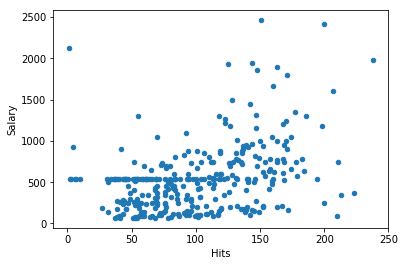

In [51]:
import matplotlib.pyplot as plt
%matplotlib inline

train.plot(kind='scatter', x='Hits', y='Salary')
plt.show()

<h3> Q.3. Apply Linear Regression on the Hitters data to predict 'Salary' depending only on 'Hits' as the independent variable. Print out the slope and intercept coefficients.
</h3>

In [52]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import numpy as np
from numpy import sqrt
from sklearn import metrics

# Split the data into 70/30 train/test datasets
X = train['Hits']
y = train['Salary']
train_x, test_x, train_y, test_y  = train_test_split(X, y, test_size=0.3, random_state=42)

# Fit linear regression model
regressor = LinearRegression()
x = train_x.values.reshape(-1,1)
regressor.fit(x, train_y)

# print the slope and intercept
print(regressor.coef_)
print(regressor.intercept_)

[2.67265151]
258.3617421213528


<h3> Q.4. Compute the RMSE of the model obtained above</h3>

In [53]:
from sklearn.metrics import mean_squared_error
from math import sqrt

test_x = test_x.values.reshape(-1,1)
pred = regressor.predict(test_x)
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(test_y, pred)))
print('R2 value:', metrics.r2_score(test_y, pred))


Root Mean Squared Error: 414.4855851467615
R2 value: 0.19258142061651995


<h3> Q.5. Graph the linear regression model obtained on the data</h3>

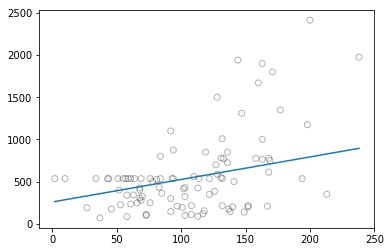

In [54]:
# Visualisation
linear_regr = np.linspace(test_x.min(),test_x.max())
linear_regr = linear_regr.reshape(-1,1)
plot = regressor.predict(linear_regr)

plt.scatter(test_x, test_y, facecolor='None', edgecolor='k', alpha=0.3)
plt.plot(linear_regr, plot)
plt.show()

<h3> Q.6. Construct a polynomial regression model with degree 2 to predict 'Salary' depending only on 'Hits' as the independent variable. Compute the RMSE and Plot your result.
</h3>

[ 2.06714107e-02 -1.68855257e+00  4.43517426e+02]
397.5813824199521


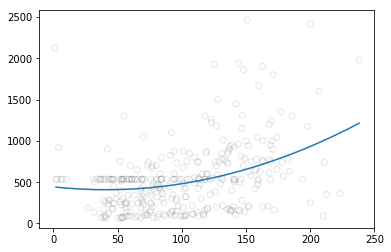

In [55]:
import numpy as np

# Generate weights for polynomial function with degree 2
weights = np.polyfit(train_x, train_y, 2)
print(weights)

# Generate model with the given weights
poly_model = np.poly1d(weights)

# Prediction on test set
pred = poly_model(test_x)

# Compute the RMSE
test_x = test_x.reshape(-1,1)
pred = poly_model(test_x)

rms = sqrt(mean_squared_error(test_y, pred))
print(rms)

# Plot the visualisation
poly_regr = np.linspace(test_x.min(),test_x.max())
plot = poly_model(poly_regr)

plt.scatter(train.Hits, train.Salary, facecolor='None', edgecolor='k', alpha=0.1)
plt.plot(linear_regr, plot)
plt.show()

<h3> Q.7. Create a cubic spline with 3 knots at 40, 100 and 150</h3>

422.7573763501608


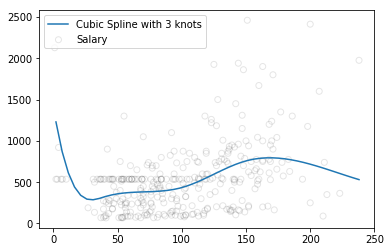

In [56]:
from patsy import dmatrix
import statsmodels.api as sm
import statsmodels.formula.api as smf

# Generate a cubic spline with 3 knots at 40, 100 and 150
transformed_x = dmatrix("bs(train, knots=(40,100,150), degree=3, include_intercept=False)", {"train": train_x},return_type='dataframe')

# Fit a generalized linear models on the transformed dataset
fit_glm = sm.GLM(train_y, transformed_x).fit()

# Prediction
pred_glm = fit_glm.predict(dmatrix("bs(valid, knots=(40,100,150), include_intercept=False)", {"valid": test_x}, return_type='dataframe'))

# TODO: Compute the RMSE 
rms = sqrt(mean_squared_error(test_y, pred_glm))
print(rms)

# Plot the visualisation
lin = np.linspace(test_x.min(),test_x.max())
pred_glm = fit_glm.predict(dmatrix("bs(xp, knots=(40,100,150), include_intercept=False)", {"xp": lin}, return_type='dataframe'))


plt.scatter(train.Hits, train.Salary, facecolor='None', edgecolor='k', alpha=0.1)
plt.plot(lin, pred_glm, label='Cubic Spline with 3 knots')
plt.legend()
plt.show()

<h3> Q.8. Create a natural cubic spline on the data to predict 'Salary' based on 'Hits'</h3>

405.9732360282033


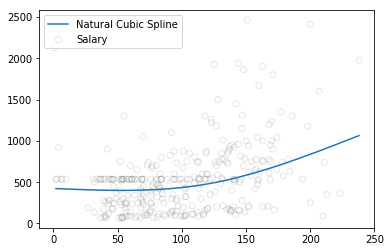

In [57]:
# Generate natural cubic spline
transformed_x = dmatrix("cr(train,df = 3)", {"train": train_x}, return_type='dataframe')
fit_spline = sm.GLM(train_y, transformed_x).fit()

# Compute the RMSE 
pred_spline = fit_spline.predict(dmatrix("cr(valid, df=3)", {"valid": test_x}, return_type='dataframe'))
rms = sqrt(mean_squared_error(test_y, pred_spline))
print(rms)

# Visualization
lin = np.linspace(test_x.min(),test_x.max())
pred_spline = fit_spline.predict(dmatrix("cr(xp, df=3)", {"xp": lin}, return_type='dataframe'))

plt.scatter(train.Hits, train.Salary, facecolor='None', edgecolor='k', alpha=0.1)
plt.plot(lin, pred_spline, label='Natural Cubic Spline')
plt.legend()
plt.show()

<h3> Q.9. Which model performed the best?</h3>

polynomial regression model with degree 2 performed the best in this case with the least RMSE

<h3><h3> Q.10. Create a new text cell in your Notebook: Complete a 50-100 word summary 
    (or short description of your thinking in applying this week's learning to the solution) 
     of your experience in this assignment. Include:
<br>                                                                       
What was your incoming experience with this model, if any?
what steps you took, what obstacles you encountered.
how you link this exercise to real-world, machine learning problem-solving. (What steps were missing? What else do you need to learn?)
This summary allows your instructor to know how you are doing and allot points for your effort in thinking and planning, and making connections to real-world work.
</h3>

Most of the models in real-world will not be linear. This lesson helped us to take a look beyond linearity.
The assignment had its own challenges from plotting the graph using different models to figuring out what is the best option.
At the end looks like the natural spline and the ploynomial regression plots are looking very similar.

It will be great if we can try with GAM model as well. Because that takes into consideration all the predictors.
Overall, I felt this exercise was challenging and we learnt good details about models beyond linearity.